# Problem Statement:
- You are working as a data scientist in a
global finance company. Over the
years, the company has collected basic
bank details and gathered a lot of
credit-related information. The
management wants to build an
intelligent system to segregate the
people into credit score brackets to
reduce the manual efforts. Given a
person’s credit-related information,
build a machine learning model that
can classify the credit score.

# Dataset Information:
- Credit score dataset contains 1 lac records with 28 features.

| **Attribute**                  | **Description**                                                        |
| ------------------------------ | ---------------------------------------------------------------------- |
| **ID**                         | Unique identification of an entry                                      |
| **Customer\_ID**               | Unique identification of a person                                      |
| **Month**                      | Month of the year                                                      |
| **Name**                       | Name of a person                                                       |
| **Age**                        | Age of the person                                                      |
| **SSN**                        | Social security number of a person                                     |
| **Occupation**                 | Occupation of the person                                               |
| **Annual\_Income**             | Annual income of the person                                            |
| **Monthly\_Inhand\_Salary**    | Monthly base salary of the person                                      |
| **Num\_Bank\_Accounts**        | Number of bank accounts a person holds                                 |
| **Num\_Credit\_Card**          | Number of other credit cards held by a person                          |
| **Interest\_Rate**             | Interest rate on credit card                                           |
| **Num\_of\_Loan**              | Number of loans taken from the bank                                    |
| **Type\_of\_Loan**             | Types of loan taken by a person                                        |
| **Delay\_from\_due\_date**     | Average number of days delayed from the payment date                   |
| **Num\_of\_Delayed\_Payment**  | Number of times payment was delayed                                    |
| **Changed\_Credit\_Limit**     | Percentage change in credit card limit                                 |
| **Num\_Credit\_Inquiries**     | Number of credit card inquiries                                        |
| **Credit\_Mix**                | Classification of the mix of credits (e.g., Good, Standard, Bad)       |
| **Outstanding\_Debt**          | Remaining debt to be paid (in USD)                                     |
| **Credit\_Utilization\_Ratio** | Utilization ratio of credit card                                       |
| **Credit\_History\_Age**       | The age of credit history of the person                                |
| **Payment\_of\_Min\_Amount**   | Indicates whether the minimum amount was paid by the person            |
| **Total\_EMI\_per\_month**     | Monthly EMI payments (in USD)                                          |
| **Amount\_Invested\_monthly**  | Monthly amount invested by the customer (in USD)                       |
| **Payment\_Behaviour**         | Payment behavior of the customer (e.g., regularly, minimum only, etc.) |
| **Monthly\_Balance**           | Monthly balance amount of the customer (in USD)                        |
| **Credit\_Score**              | The bracket of credit score (e.g., Poor, Standard, Good, Excellent)    |


In [1]:
# Classic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Data Preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Ml Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Data Loading
df = pd.read_csv('credit_score.csv')
df=df.drop(columns=["ID", "Customer_ID", "Name", "SSN", "Type_of_Loan", "Credit_History_Age"])
df.head()

<ipython-input-2-3880d1c103b4>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('credit_score.csv')


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
# Shape of DataFrame
df.shape

(100000, 22)

In [4]:
# datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [5]:
#calculating the statistical data.
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


In [7]:
# Age
df["Age"]=df["Age"].str.replace("_","")
df["Age"]=df["Age"].astype(int)
# Occupation
df["Occupation"]=df["Occupation"].replace("_______", np.nan)
#Annual_Income
df["Annual_Income"]=df["Annual_Income"].str.replace("_","")
df["Annual_Income"]=df["Annual_Income"].astype(float)
# Num_of_Loan
df["Num_of_Loan"]=df["Num_of_Loan"].str.replace("_","")
df["Num_of_Loan"]=df["Num_of_Loan"].astype(int)
# Num_of_Delayed_Payment
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].str.replace("_","")
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].astype(float)
# Credit_Score
df["Credit_Score"]=df["Credit_Score"].replace(["Poor", "Standard", "Good"], [0,1,2])
# Monthly_Balance
df["Monthly_Balance"]=df["Monthly_Balance"].str.replace("_","")
df["Monthly_Balance"]=df["Monthly_Balance"].astype(float)
# Payment_Behaviour
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8", np.nan)
# Amount_invested_monthly
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("_","")
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].astype(float)
# Payment_of_Min_Amount
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("NM", "No")
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace(["Yes", "No"], [1,0])
# Outstanding_Debt
df["Outstanding_Debt"]= df["Outstanding_Debt"].str.replace("_","")
df["Outstanding_Debt"]=df["Outstanding_Debt"].astype(float)
# Credit_Mix
df["Credit_Mix"]=df["Credit_Mix"].replace("_", np.nan)
df["Credit_Mix"]=df["Credit_Mix"].replace(["Standard", "Good", "Bad"], [1,2,0])
# Changed_Credit_Limit
df["Changed_Credit_Limit"]= df["Changed_Credit_Limit"].replace("_", np.nan)
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].astype(float)

<ipython-input-7-9ba202234dbb>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Credit_Score"]=df["Credit_Score"].replace(["Poor", "Standard", "Good"], [0,1,2])
<ipython-input-7-9ba202234dbb>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace(["Yes", "No"], [1,0])
<ipython-input-7-9ba202234dbb>:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [9]:
# Percentage of null values to the dataset
df.isnull().sum()

,0
Month,0
Age,0
Occupation,7062
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


- Forward and backward filling are imputation methods used to handle missing values in sequential or time series data. Forward filling propagates the last known value forward, while backward filling propagates the next known value backward.

In [10]:
df.ffill(inplace=True)  # Forward fill
df.bfill(inplace=True)  # Backward fill
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


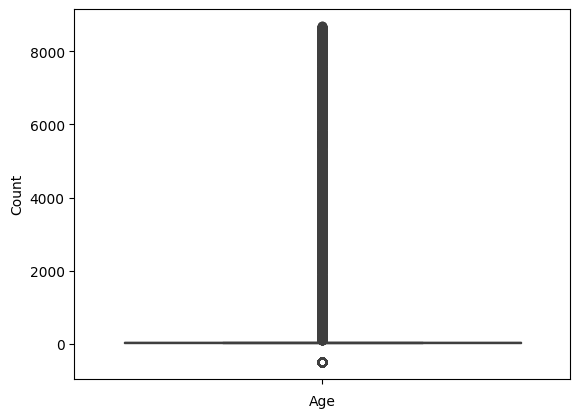

In [11]:
# removing outliers from age since all other columns values are relevant
sns.boxplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

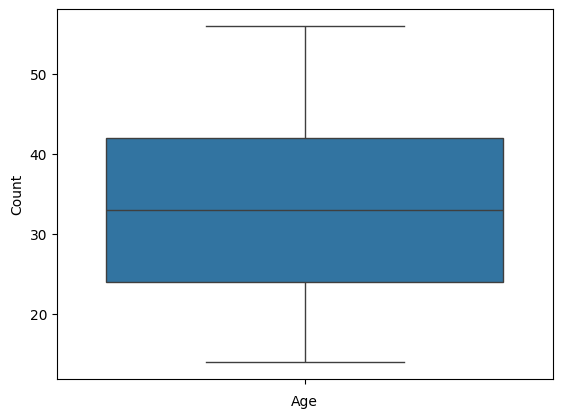

In [12]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
LL = Q1 - IQR * 1.5
UL = Q3 + IQR * 1.5
df = df[(df["Age"] <= UL) & (df["Age"] >=LL)]

sns.boxplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [13]:
df.shape

(97219, 22)

In [14]:
# Label Encoding
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])
        print(f'Column Name : {i}')
        print("Original ---> Encoded")
        for original_class,encoded_value in zip(le.classes_,le.transform(le.classes_)):
            print(f'{original_class}->{encoded_value}')
        print()

Column Name : Month
Original ---> Encoded
April->0
August->1
February->2
January->3
July->4
June->5
March->6
May->7

Column Name : Occupation
Original ---> Encoded
Accountant->0
Architect->1
Developer->2
Doctor->3
Engineer->4
Entrepreneur->5
Journalist->6
Lawyer->7
Manager->8
Mechanic->9
Media_Manager->10
Musician->11
Scientist->12
Teacher->13
Writer->14

Column Name : Payment_Behaviour
Original ---> Encoded
High_spent_Large_value_payments->0
High_spent_Medium_value_payments->1
High_spent_Small_value_payments->2
Low_spent_Large_value_payments->3
Low_spent_Medium_value_payments->4
Low_spent_Small_value_payments->5



In [15]:
#Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
  if ((df[col].dtype != 'object') & (col != 'Credit_Score') ):
    col_list.append(col)

X = df[col_list]
vif_data  = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                     feature       VIF
0                      Month  0.299876
1                        Age  0.094595
2                 Occupation  0.277718
3              Annual_Income  0.984992
4      Monthly_Inhand_Salary  0.365741
5          Num_Bank_Accounts  0.979257
6            Num_Credit_Card  0.970542
7              Interest_Rate  0.976433
8                Num_of_Loan  0.997749
9        Delay_from_due_date  0.331933
10    Num_of_Delayed_Payment  0.981687
11      Changed_Credit_Limit  0.299343
12      Num_Credit_Inquiries  0.979734
13                Credit_Mix  0.321550
14          Outstanding_Debt  0.396238
15  Credit_Utilization_Ratio  0.024515
16     Payment_of_Min_Amount  0.476357
17       Total_EMI_per_month  0.972340
18   Amount_invested_monthly  0.911368
19         Payment_Behaviour  0.310328
20           Monthly_Balance  1.000212


- Selecting the features using VIF. VIF should be less
than 5. Here, all features have VIF value less than
5, So we will select all the features.

## Model Building

In [16]:
x = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
'''
Standardisation is import for distance based aldorithms like logistic regression and SVM

In Logistic Regression :
- The gradient is influenced by the scale of the features.
- If one feature has a large range (e.g., Annual_Income) and another a small range (e.g., Age),
  the larger-scale feature will dominate the loss function, making optimization harder and less stable.

SVM is very sensitive to feature scales because:
- Distance calculations (e.g.,∥xi −xj∥) assume features are on similar scales.
- Features with larger scales dominate the distance.
- This can cause biased margins, poor separation, and bad model performance.
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Logistic Regression Model

In [19]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

from sklearn.metrics import accuracy_score, classification_report
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_lr)
print("Classification Report :\n",classification_report(y_test, y_pred))
result = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
result

Accuracy Score :  0.6157683604196668
Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.41      0.49      5674
           1       0.66      0.70      0.68     10363
           2       0.51      0.69      0.59      3407

    accuracy                           0.62     19444
   macro avg       0.60      0.60      0.59     19444
weighted avg       0.62      0.62      0.61     19444



,Actual,Predicted
90340,0,1
75422,1,1
66839,1,0
16444,0,2
16890,1,1
...,...,...
94483,1,1
42260,1,1
55765,1,0
62976,2,2


### Decision Tree Classifier Model

In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

accuracy_dtc = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_dtc)
print("Classification Report :\n",classification_report(y_test, y_pred))
result = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
result

Accuracy Score :  0.6959473359391072
Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.68      0.68      5674
           1       0.73      0.73      0.73     10363
           2       0.62      0.63      0.63      3407

    accuracy                           0.70     19444
   macro avg       0.68      0.68      0.68     19444
weighted avg       0.70      0.70      0.70     19444



,Actual,Predicted
90340,0,0
75422,1,0
66839,1,0
16444,0,0
16890,1,2
...,...,...
94483,1,1
42260,1,1
55765,1,1
62976,2,2


#### Hyperparameter Tuning on Decision Tree

In [21]:
'''
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[2,3,5,10,50],
    'max_features':['log2','sqrt','auto'],
    'min_samples_leaf':[1,10,8,5],
    'min_samples_split':[2,3,50,100]
}
grid_search = GridSearchCV(estimator=dtc, param_grid=parameters)
grid_search = grid_search.fit(x_train, y_train)

dt = grid_search.best_estimator_
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_dt)
print("Classification Report :\n",classification_report(y_test, y_pred))
result = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
result
'''

'\nfrom sklearn.model_selection import GridSearchCV\nparameters = {\n    \'criterion\':[\'gini\',\'entropy\'],\n    \'max_depth\':[2,3,5,10,50],\n    \'max_features\':[\'log2\',\'sqrt\',\'auto\'],\n    \'min_samples_leaf\':[1,10,8,5],\n    \'min_samples_split\':[2,3,50,100]\n}\ngrid_search = GridSearchCV(estimator=dtc, param_grid=parameters)\ngrid_search = grid_search.fit(x_train, y_train)\n\ndt = grid_search.best_estimator_\ndt.fit(x_train, y_train)\ny_pred = dt.predict(x_test)\n\naccuracy_dt = accuracy_score(y_test, y_pred)\nprint("Accuracy Score : ",accuracy_dt)\nprint("Classification Report :\n",classification_report(y_test, y_pred))\nresult = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})\nresult\n'

### Random Forest Classifier Model

In [22]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

accuracy_rfc = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_rfc)
print("Classification Report :\n",classification_report(y_test, y_pred))
result = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
result

Accuracy Score :  0.7984468216416375
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      5674
           1       0.82      0.81      0.81     10363
           2       0.75      0.74      0.75      3407

    accuracy                           0.80     19444
   macro avg       0.79      0.79      0.79     19444
weighted avg       0.80      0.80      0.80     19444



,Actual,Predicted
90340,0,0
75422,1,0
66839,1,0
16444,0,0
16890,1,2
...,...,...
94483,1,1
42260,1,1
55765,1,1
62976,2,2


### SVC model

In [23]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)
y_pred = svc_model.predict(x_test_scaled)

accuracy_svc = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_svc)
print("Classification Report :\n",classification_report(y_test, y_pred))
result = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
result

Accuracy Score :  0.6602550915449495
Classification Report :
               precision    recall  f1-score   support

           0       0.69      0.54      0.61      5674
           1       0.74      0.68      0.71     10363
           2       0.49      0.78      0.61      3407

    accuracy                           0.66     19444
   macro avg       0.64      0.67      0.64     19444
weighted avg       0.68      0.66      0.66     19444



,Actual,Predicted
90340,0,1
75422,1,1
66839,1,0
16444,0,2
16890,1,0
...,...,...
94483,1,1
42260,1,1
55765,1,1
62976,2,2


# Comparing Accuracy of different model

In [27]:
print("Logistic Regression Accuracy : ",accuracy_lr)
print("Decision Tree Accuracy       : ",accuracy_dtc)
print("Random Forest Accuracy       : ",accuracy_rfc)
print("SVC Accuracy                 : ",accuracy_svc)

# Best model
accuracies = {
    "Logistic Regression": accuracy_lr,
    "Decision Tree": accuracy_dtc,
    "Random Forest": accuracy_rfc,
    "SVC": accuracy_svc
}

best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy}")

Logistic Regression Accuracy :  0.6157683604196668
Decision Tree Accuracy       :  0.6959473359391072
Random Forest Accuracy       :  0.7984468216416375
SVC Accuracy                 :  0.6602550915449495

Best Model: Random Forest with Accuracy: 0.7984468216416375


In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [30]:
y_pred = grid.predict(x_test)
accuracy_rfc_hpt = accuracy_score(y_test, y_pred)
print("Accuracy Score : ",accuracy_rfc_hpt)
print("Classification Report :\n",classification_report(y_test, y_pred))

Accuracy Score :  0.7989096893643284
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5674
           1       0.82      0.81      0.81     10363
           2       0.76      0.75      0.75      3407

    accuracy                           0.80     19444
   macro avg       0.79      0.79      0.79     19444
weighted avg       0.80      0.80      0.80     19444

